Hello


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set a consistent random state for reproducibility
RANDOM_STATE = 42

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Print dataset information
print(f"Features: {data.feature_names[:5]}...") # Show first 5 features
print(f"Target classes: {data.target_names}")
print(f"Data shape: {X.shape}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']...
Target classes: ['malignant' 'benign']
Data shape: (569, 30)


In [3]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 398
Testing samples: 171


In [4]:
# This cell follows the exact instructions for the "Train the model" step.

from sklearn.tree import DecisionTreeClassifier 
# Initialize the classifier 
dt_classifier = DecisionTreeClassifier(random_state=RANDOM_STATE) 
# Fit the model to the training data 
dt_classifier.fit(X_train, y_train)

print("Unpruned Decision Tree model trained successfully.")

Unpruned Decision Tree model trained successfully.


In [5]:
# We evaluate the unpruned model first to establish a baseline and see the overfitting.
print("--- Evaluation of Unpruned Model ---")

# Check training accuracy (will likely be 1.0, a sign of overfitting)
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Check testing accuracy
y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=data.target_names))

# The large gap between Training Accuracy (1.0) and Test Accuracy is a clear sign of overfitting.

--- Evaluation of Unpruned Model ---
Training Accuracy: 1.0000
Test Accuracy: 0.9415

Test Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.95      0.92        63
      benign       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



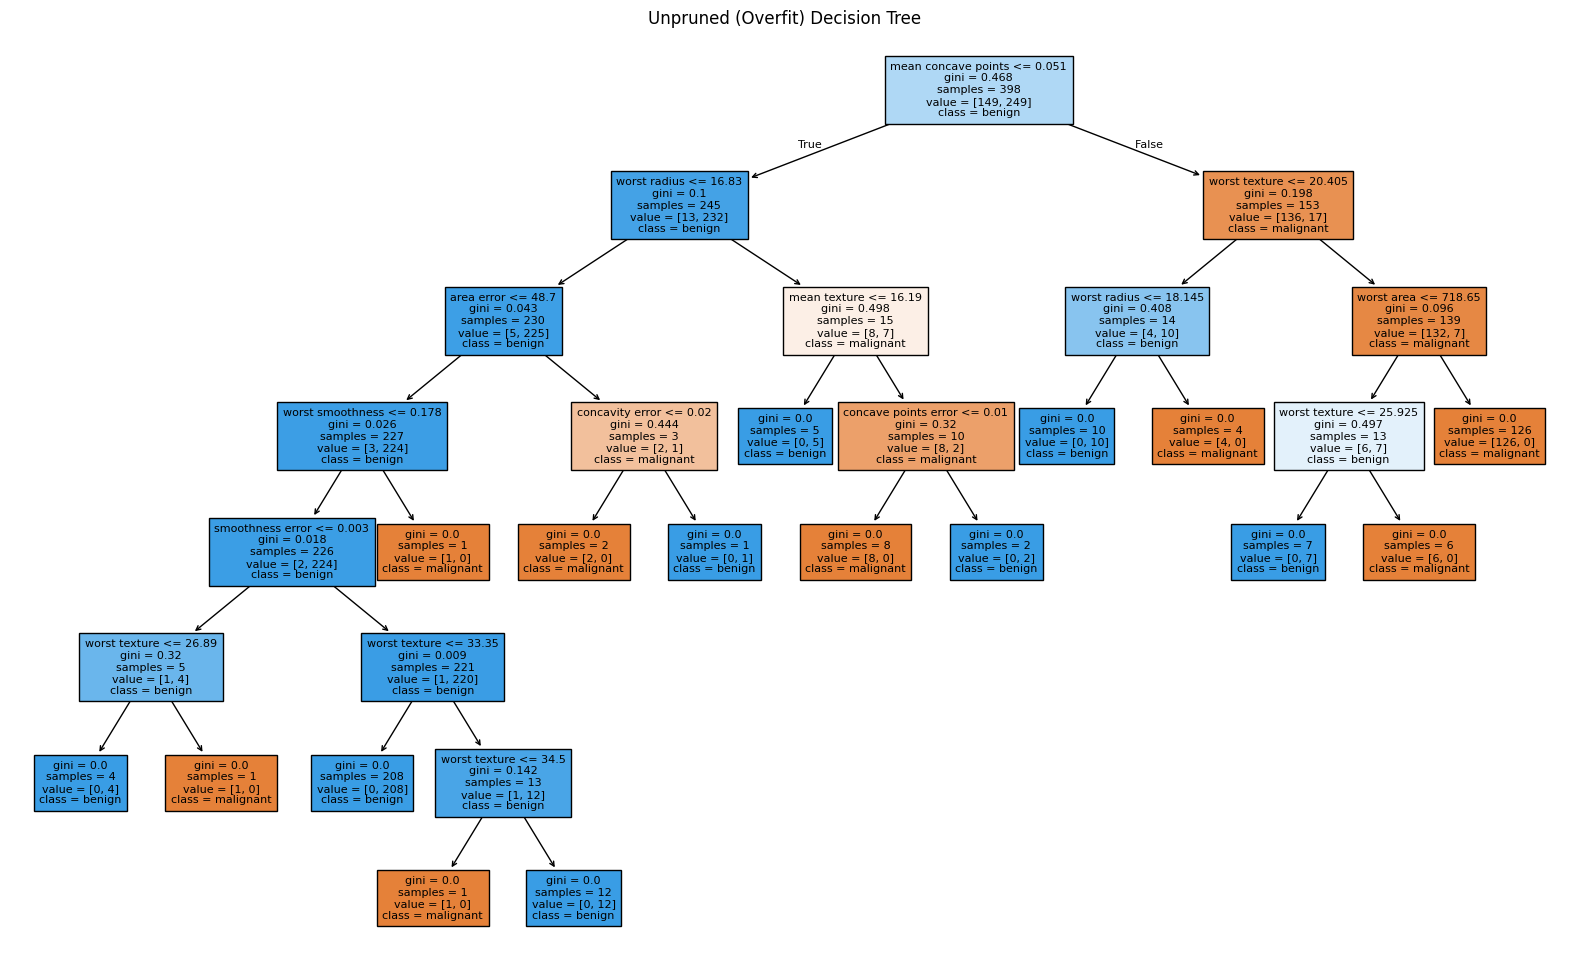

In [6]:
# Let's visualize the complex, overfit tree
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          filled=True, 
          feature_names=data.feature_names, 
          class_names=data.target_names,
          fontsize=8)
plt.title("Unpruned (Overfit) Decision Tree")
plt.show()

# Observe how deep and complex this tree is. It has learned the noise in the training data.

In [7]:
# Let's take a single sample from the test set to classify
# We use .reshape(1, -1) because the model expects a 2D array
new_sample = X_test[0].reshape(1, -1) 
actual_label_index = y_test[0]
actual_label_name = data.target_names[actual_label_index]

# Predict the class
prediction = dt_classifier.predict(new_sample)
predicted_label_name = data.target_names[prediction[0]]

print(f"--- New Sample Classification (Unpruned) ---")
print(f"Actual Class: {actual_label_name} ({actual_label_index})")
print(f"Predicted Class: {predicted_label_name} ({prediction[0]})")

--- New Sample Classification (Unpruned) ---
Actual Class: benign (1)
Predicted Class: benign (1)


In [8]:
# This cell contains the exact code provided in your Step 8 instructions.

# Initialize the classifier with pruning parameters 
pruned_dt_classifier = DecisionTreeClassifier( 
    max_depth=5,              # Maximum depth of the tree 
    min_samples_split=10,     # Minimum number of samples required to split an internal node 
    min_samples_leaf=5,       # Minimum number of samples required to be at a leaf node 
    max_features='sqrt',      # Use sqrt(n_features) features for each split 
    random_state=RANDOM_STATE 
) 

# Fit the model to the training data 
pruned_dt_classifier.fit(X_train, y_train)

print("Pruned Decision Tree model trained successfully.")

Pruned Decision Tree model trained successfully.


In [9]:
# This cell contains the logic from your Step 9 instructions.
# We also add the training accuracy to compare against the unpruned model.

print("--- Evaluation of Pruned Model ---")

# Check training accuracy (should be lower than 1.0 now)
y_train_pred_pruned = pruned_dt_classifier.predict(X_train)
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
print(f"Training Accuracy (Pruned): {train_accuracy_pruned:.4f}")

# Make predictions with the pruned model 
y_pred_pruned = pruned_dt_classifier.predict(X_test) 

# Print classification report 
print("\nClassification Report (Pruned):")
print(classification_report(y_test, y_pred_pruned, target_names=data.target_names)) 

# Print confusion matrix 
print("Confusion Matrix (Pruned):") 
print(confusion_matrix(y_test, y_pred_pruned)) 

# Print accuracy score 
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_pruned):.4f}")

--- Evaluation of Pruned Model ---
Training Accuracy (Pruned): 0.9472

Classification Report (Pruned):
              precision    recall  f1-score   support

   malignant       0.87      0.87      0.87        63
      benign       0.93      0.93      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Confusion Matrix (Pruned):
[[ 55   8]
 [  8 100]]

Accuracy: 0.9064


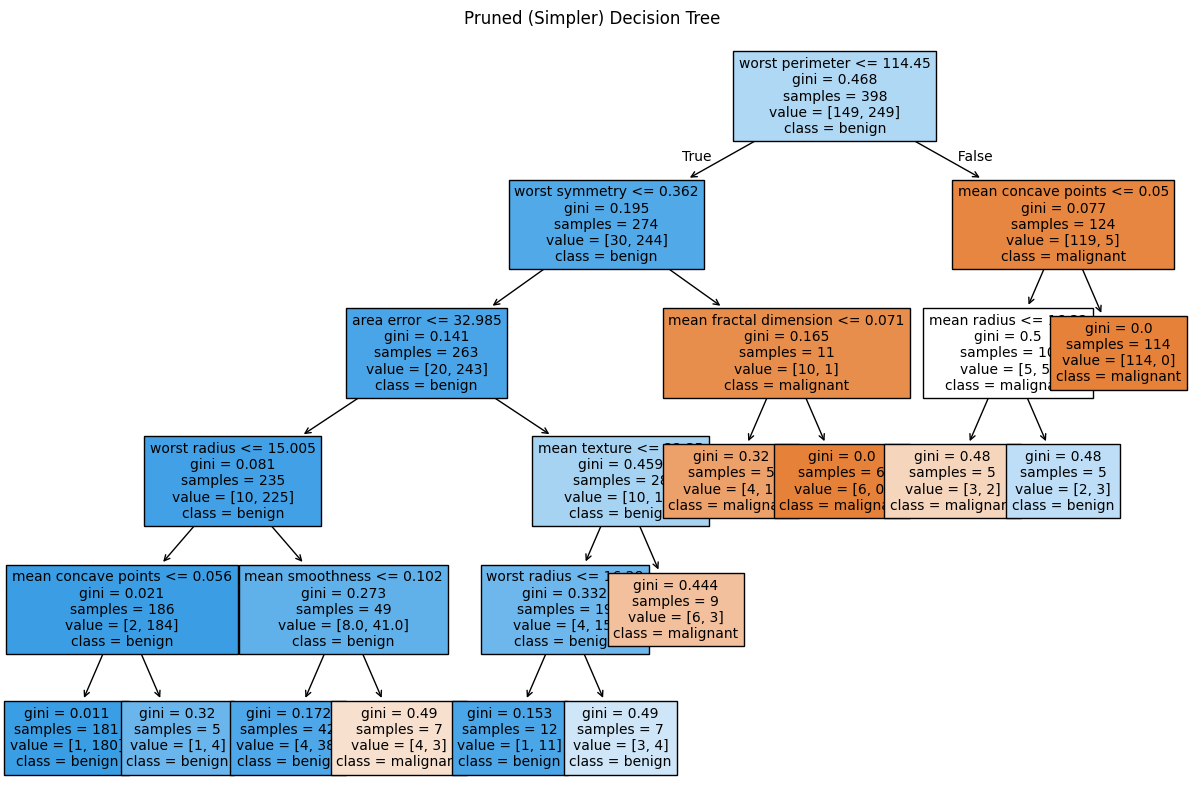

In [10]:
# Let's visualize the new, simpler pruned tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_dt_classifier, 
          filled=True, 
          feature_names=data.feature_names, 
          class_names=data.target_names,
          fontsize=10,
          max_depth=5) # Only show top 5 levels for clarity
plt.title("Pruned (Simpler) Decision Tree")
plt.show()

# Note how this tree is much smaller and simpler due to the max_depth=5 limit.

In [11]:
# We use the same sample from Step 7 to see if the pruned model agrees

# new_sample and actual_label_name are from Cell 8
# new_sample = X_test[0].reshape(1, -1) 
# actual_label_name = data.target_names[y_test[0]]

# Predict the class with the new pruned model
prediction_pruned = pruned_dt_classifier.predict(new_sample)
predicted_label_name_pruned = data.target_names[prediction_pruned[0]]

print(f"--- New Sample Classification (Pruned) ---")
print(f"Actual Class: {actual_label_name}")
print(f"Predicted Class: {predicted_label_name_pruned}")

--- New Sample Classification (Pruned) ---
Actual Class: benign
Predicted Class: benign


In [ ]:
import joblib

# 1. Define your trained model object
# (This assumes 'pruned_dt_classifier' is your trained model variable)
model = pruned_dt_classifier 

# 2. Define the filename for your model
filename = 'decision_tree_model.pkl'

# 3. Save the model to the file
joblib.dump(model, filename)

print(f"Model saved successfully to {filename}")